In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import os

### Half Barrier data

In [47]:
hb_upper_data = ['/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.1-20171120-11:24:23/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.2-20171120-11:32:14/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.3-20171120-11:36:00/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.4-20171120-11:44:14/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.5-20171120-11:52:32/',
                '/home/nefta/thesis/results/hb_upper/supercurrent/vsg=-0.6-20171120-12:00:40/']

vsg_values = [-0.1, -0.2, -0.3, -0.4, -0.5, -0.6]

In [42]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)
fontlabelsize = 24
ticklabelsize = 20

In [30]:
round(cmap.N / len(hb_upper_data))

43

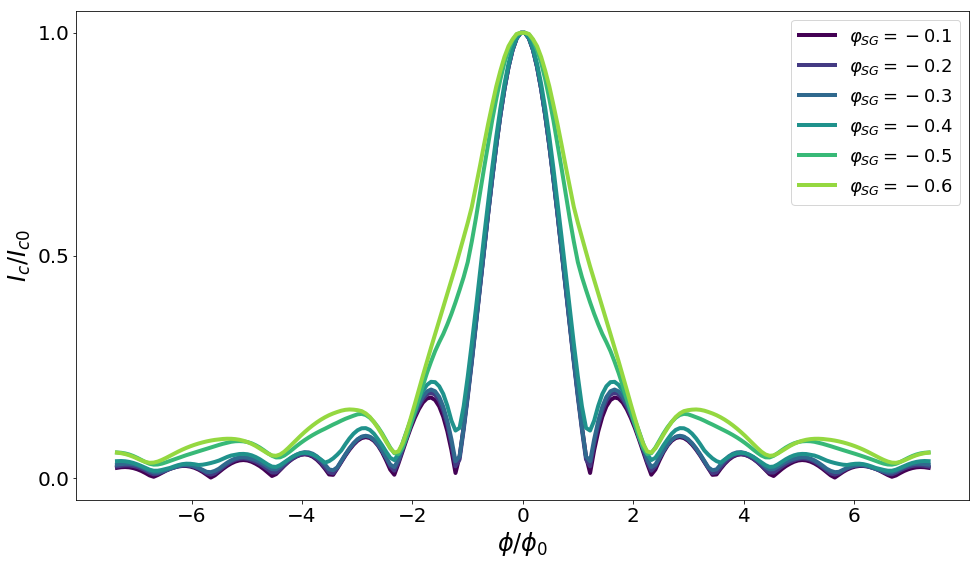

In [58]:
fig, ax = plt.subplots(figsize=(16, 9))
maxB = 5e-05
bvalues = np.linspace(-maxB, maxB, 200)
fluxvalues = bvalues * 700 * 210
colordelta = round(cmap.N / len(hb_upper_data))
for index, (datafile, vsg) in enumerate(zip(hb_upper_data, vsg_values)):
    data = pd.read_csv(datafile + 'data.csv', header=None)[0].values
    ic_zero = np.amax(data)
    ax.plot(fluxvalues, data / ic_zero, color=cmap(index*colordelta), linewidth=4,
           label=r'$\varphi_{{SG}} = {}$'.format(vsg))
ax.xaxis.set_ticks(np.arange(-6, 7, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1, 0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
ax.legend(prop={'size':18})
#fig.savefig('hb_upper.eps')

In [37]:
hb_lower_data = ['/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.1-20171120-11:44:30/',
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.2-20171120-11:52:18/',
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.3-20171120-12:00:06/',
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.4-20171120-12:08:00/',
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.5-20171120-12:15:49/', 
                '/home/nefta/thesis/results/hb_lower/supercurrent/vsg=-0.6-20171120-12:23:45/']


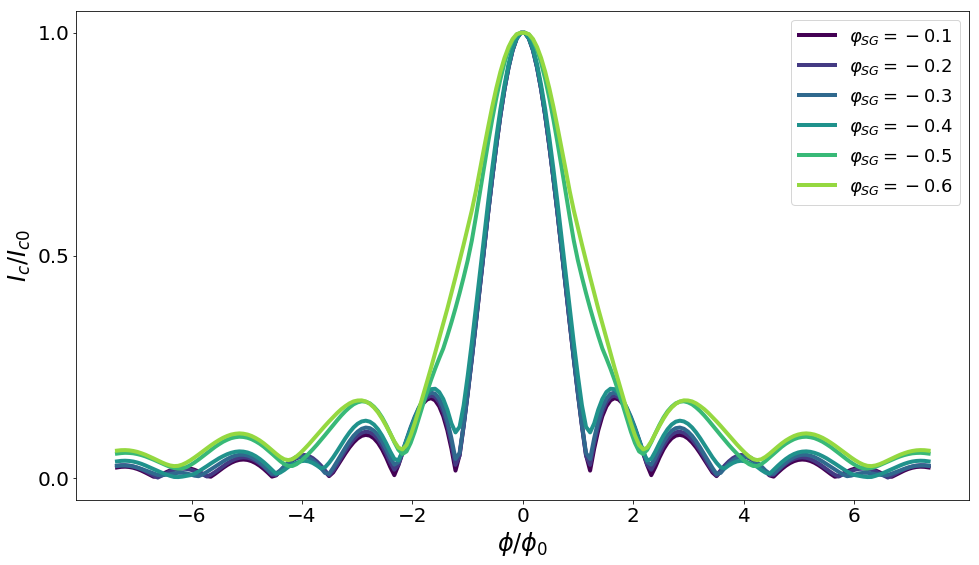

In [59]:
fig, ax = plt.subplots(figsize=(16, 9))

for index, (datafile, vsg) in enumerate(zip(hb_lower_data, vsg_values)):
    colordelta = round(cmap.N / len(hb_lower_data))    
    data = pd.read_csv(datafile + 'data.csv', header=None)[0].values
    ic_zero = np.amax(data)
    #ax.plot(data / ic_zero)    
    ax.plot(fluxvalues, data / ic_zero, color=cmap(index*colordelta), linewidth=4,
           label=r'$\varphi_{{SG}} = {}$'.format(vsg))
    
ax.xaxis.set_ticks(np.arange(-6, 7, 2))
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_ticks([1,0.5, 0])
ax.yaxis.set_tick_params(labelsize=ticklabelsize)
ax.set_xlabel(r'$\phi / \phi_0$', fontsize=fontlabelsize)
ax.set_ylabel(r'$I_c / I_{c0}$', fontsize=fontlabelsize)
ax.legend(prop={'size':18})
#fig.savefig('hb_lower.eps')

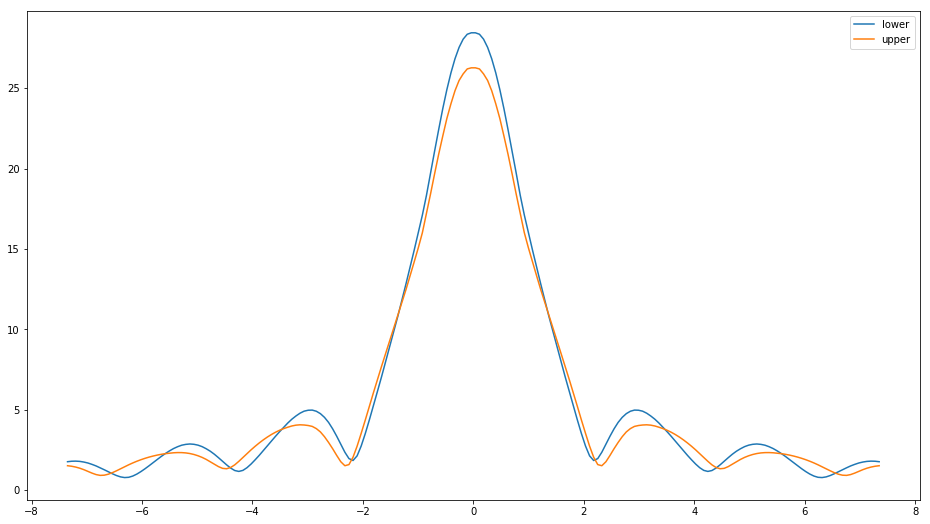

In [61]:
fig, ax = plt.subplots(figsize=(16,9))

data_low = pd.read_csv(hb_lower_data[-1] + 'data.csv', header=None)[0].values
data_up = pd.read_csv(hb_upper_data[-1] + 'data.csv',  header=None)[0].values

ax.plot(fluxvalues, data_low, label='lower')
ax.plot(fluxvalues, data_up, label='upper')
ax.legend()